In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
path = '/content/drive/MyDrive/CSV/sumber - Sheet1.csv' 
df = pd.read_csv(path) 

df.describe() 

,tahun,panjang,luas
count,25.000000,25.000000,25.000000
mean,2012.680000,4349.680000,341828.800000
std,0.476095,2230.664787,162934.046532
min,2012.000000,1281.000000,148900.000000
25%,2012.000000,2300.000000,188000.000000
50%,2013.000000,4320.000000,292600.000000
75%,2013.000000,5680.000000,464950.000000
max,2013.000000,8330.000000,664950.000000


In [3]:
df

,tahun,nama_sungai,panjang,luas,peruntukan
0,2013,Krukut,1281,148900,Air Baku Air Minum
1,2013,Mookervart,1320,158000,Air Baku Air Minum
2,2013,Kali Angke,1370,165200,Usaha Perkotaan
3,2013,Sungai Grogol,1485,172500,Perikanan
4,2013,Kali Cideng,1681,177000,Usaha Perkotaan
5,2013,Kalibaru Timur,1920,182300,Usaha Perkotaan
6,2013,Cipinang,2300,188000,Usaha Perkotaan
7,2013,Sunter,2640,190000,Usaha Perkotaan
8,2013,Cakung,3270,233600,Usaha Perkotaan
9,2013,Buaran,3400,238200,Usaha Perkotaan


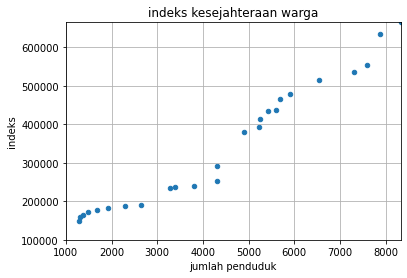

In [5]:
import matplotlib.pyplot as plt #Visualisasi data

df.plot(kind='scatter', x='panjang', y= 'luas') #untuk nama variable

plt.title('indeks kesejahteraan warga')
plt.xlabel('jumlah penduduk')
plt.ylabel('indeks')
plt.xlim(1000, 8330) 
plt.ylim(100000, 664950) 
plt.grid(True)
plt.show()

In [6]:
import numpy as np
x = np.array(df['panjang']) #Feature
y = np.array(df['luas']) #Target
#
print(f'x : {x}') # Data x itu adalah variable indepent atau bebas
print(f'y : {y}') # var y itu adalah variable terikat/indepent 

x : [1281 1320 1370 1485 1681 1920 2300 2640 3270 3400 3800 4300 4320 4900
 5240 5250 5430 5600 5680 5900 6540 7300 7600 7885 8330]
y : [148900 158000 165200 172500 177000 182300 188000 190000 233600 238200
 240700 251900 292600 380000 392600 414000 433600 438200 464950 480000
 514000 534810 554900 634810 664950]


In [7]:
x = x.reshape(-1,1) #Reshaping atau slice data
x.shape

(25, 1)

In [8]:
x

array([[1281],
       [1320],
       [1370],
       [1485],
       [1681],
       [1920],
       [2300],
       [2640],
       [3270],
       [3400],
       [3800],
       [4300],
       [4320],
       [4900],
       [5240],
       [5250],
       [5430],
       [5600],
       [5680],
       [5900],
       [6540],
       [7300],
       [7600],
       [7885],
       [8330]])

In [9]:
#training model
from sklearn.linear_model import LinearRegression #memanggil model regressi linear

model = LinearRegression() #Variable model bisa di ganti
model.fit(x,y) #X feature , y target

#menjadi training model

LinearRegression()

In [10]:
x_vis = np.array([0,664950]).reshape(-1, 1) #pembuatan garis merah dari x
y_vis = model.predict(x_vis) #Model machine learning

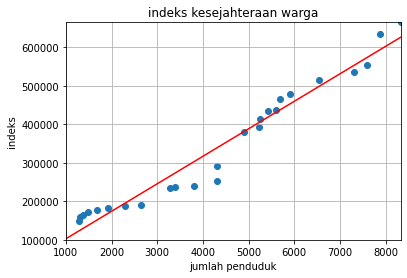

In [11]:
plt.scatter(x, y)
plt.plot(x_vis, y_vis, '-r')
plt.title('indeks kesejahteraan warga')
plt.xlabel('jumlah penduduk')
plt.ylabel('indeks')
plt.xlim(1000, 8330) 
plt.ylim(100000, 664950)  
plt.grid(True)
plt.show()

In [12]:
print(f'intercept : {model.intercept_}')
print(f'slope : {model.coef_}')

intercept : 31167.113825737033
slope : [71.42173359]


In [17]:
omzet = np.array([500000 , 400000 , 200000 , 300000 , 410000 ]).reshape(-1, 1)
omzet 

array([[500000],
       [400000],
       [200000],
       [300000],
       [410000]])

In [18]:
prediksi_indeks = model.predict(omzet)
prediksi_indeks

array([35742033.91026398, 28599860.55097633, 14315513.83240103,
       21457687.19168868, 29314077.88690509])

In [20]:
for penduduk, index in zip(omzet, prediksi_indeks):
  print(f'luas : {penduduk} prediksi indeks : {index}')


luas : [500000] prediksi indeks : 35742033.91026398
luas : [400000] prediksi indeks : 28599860.55097633
luas : [200000] prediksi indeks : 14315513.832401032
luas : [300000] prediksi indeks : 21457687.191688683
luas : [410000] prediksi indeks : 29314077.886905093


In [25]:
print("total jumlah E")
df['panjang'].sum()

total jumlah E


108742

In [26]:
print("total jumlah E")
df['luas'].sum()

total jumlah E


8545720

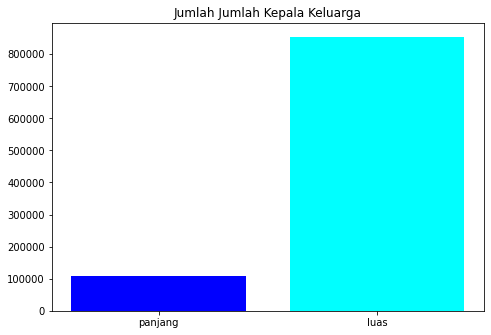

In [28]:
print()
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1,])
jurusan = ['panjang','luas']
siswa = [108742,854572]
c = ['blue','cyan','black']
plt.title("Jumlah Jumlah Kepala Keluarga")
plt.bar(jurusan, siswa, color = c)
plt.show()
print()

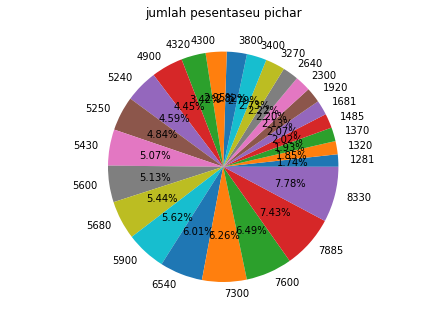

In [30]:
print()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
jurusan = df['panjang']
siswa = df['luas']
ax.pie(siswa,labels=jurusan,autopct='%1.2f%%')
plt.title("jumlah pesentaseu pichar")
plt.show()
print()
